# Explore here

In [1]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

client_secret = os.getenv("CLIENT_SECRET")

""" checking if the information is in the code"""

if not client_secret:
    raise ValueError("not the secret")
else:
    print("Good to go on secret")

Good to go on secret


In [2]:
import datetime as dt

city = "Miami"
country = "US"
metric = "imperial"
type_of_data = "forcast" # had issues with is 
url = f"http://api.openweathermap.org/data/2.5/forecast?q={city},{country}&appid={client_secret}&units={metric}"
# this url is for the last 5 day forcast
""" the f string will make it easy to insert the values on website """                         
response = requests.get(url)
data = response.json()

# test to see if api key works 
if response.status_code == 200:
    print("api key works")
else:
    raise ValueError(f"error go back and figure it out {response.status_code}")

api key works


In [3]:
print(type(data))
print(data.keys())
print(data['list'][0])

<class 'dict'>
dict_keys(['cod', 'message', 'cnt', 'list', 'city'])
{'dt': 1768964400, 'main': {'temp': 67.66, 'feels_like': 66.99, 'temp_min': 66.78, 'temp_max': 67.66, 'pressure': 1025, 'sea_level': 1025, 'grnd_level': 1025, 'humidity': 61, 'temp_kf': 0.49}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'clouds': {'all': 54}, 'wind': {'speed': 20.92, 'deg': 58, 'gust': 25.55}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2026-01-21 03:00:00'}


In [4]:
data['list'][6]['main'] # number of entrys

{'temp': 71.58,
 'feels_like': 71.96,
 'temp_min': 71.58,
 'temp_max': 71.58,
 'pressure': 1022,
 'sea_level': 1022,
 'grnd_level': 1021,
 'humidity': 75,
 'temp_kf': 0}

In [5]:
for entry in data['list'][:5]:
    weather = entry['weather'][0]['main']
    temp = entry['main']['temp']
    time = entry['dt_txt']


print(f"The weather in {city} is: {weather}")
print(f"The temperture in {city} is: {temp}f")
print(f"the time and date in {city} is: {time}")

The weather in Miami is: Clouds
The temperture in Miami is: 72.32f
the time and date in Miami is: 2026-01-21 15:00:00


In [6]:
list = []
for entry in data['list'][:5]:
    list.append({
        "weather": entry['weather'][0]['main'],
        "temp": entry['main']['temp'],
        "time": entry['dt_txt']
    })

In [21]:
print(data.keys())
data['list']

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])


[{'dt': 1768964400,
  'main': {'temp': 67.66,
   'feels_like': 66.99,
   'temp_min': 66.78,
   'temp_max': 67.66,
   'pressure': 1025,
   'sea_level': 1025,
   'grnd_level': 1025,
   'humidity': 61,
   'temp_kf': 0.49},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}],
  'clouds': {'all': 54},
  'wind': {'speed': 20.92, 'deg': 58, 'gust': 25.55},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'n'},
  'dt_txt': '2026-01-21 03:00:00'},
 {'dt': 1768975200,
  'main': {'temp': 66.2,
   'feels_like': 65.3,
   'temp_min': 65.25,
   'temp_max': 66.2,
   'pressure': 1024,
   'sea_level': 1024,
   'grnd_level': 1024,
   'humidity': 59,
   'temp_kf': 0.53},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}],
  'clouds': {'all': 73},
  'wind': {'speed': 21, 'deg': 65, 'gust': 23.55},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'n'},
  'dt_txt': '2026-01-21 06:00:00'},
 {'dt': 17

In [7]:
main_df = pd.DataFrame(list)
main_df.head()


,weather,temp,time
0,Clouds,67.66,2026-01-21 03:00:00
1,Clouds,66.20,2026-01-21 06:00:00
2,Clouds,66.15,2026-01-21 09:00:00
3,Rain,64.99,2026-01-21 12:00:00
4,Clouds,72.32,2026-01-21 15:00:00


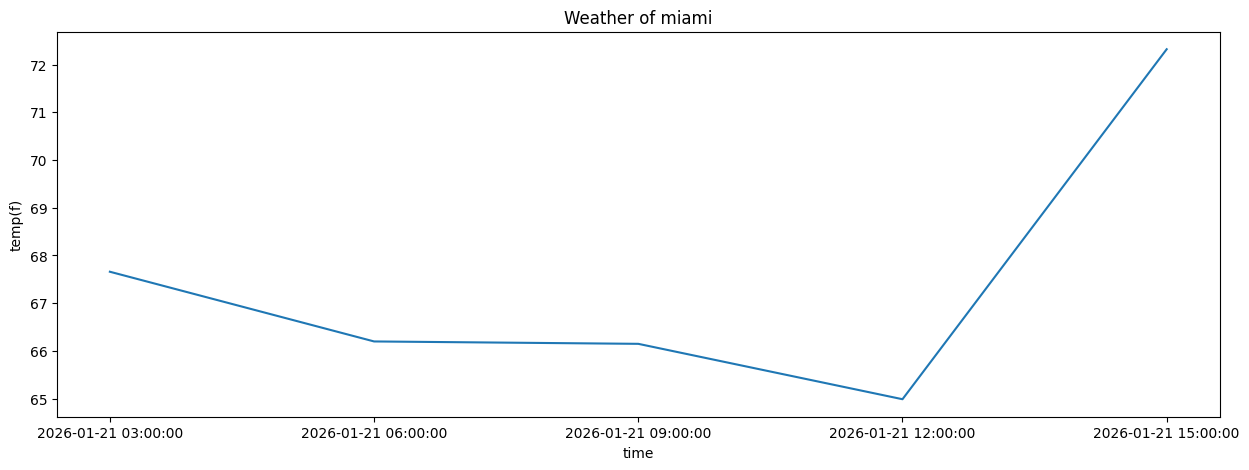

In [11]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.lineplot(x=main_df['time'], y=main_df['temp'])
plt.title("Weather of miami")
plt.xlabel("time")
plt.ylabel("temp(f)")
plt.show()

In [26]:
import sqlite3
# this creates data base to sql
conn = sqlite3.connect('main_df', isolation_level=None)

In [27]:
#send data frame to sql 
main_df.to_sql("list", conn, if_exists="replace", index= False)

5

In [ ]:
find_data = conn.cursor()
rows = find_data.execute("SELECT * FROM list LIMIT 5").fetchall()
# using this function a lot in this project
for row in rows:
    print(row)

('Clouds', 67.66, '2026-01-21 03:00:00')
('Clouds', 66.2, '2026-01-21 06:00:00')
('Clouds', 66.15, '2026-01-21 09:00:00')
('Rain', 64.99, '2026-01-21 12:00:00')
('Clouds', 72.32, '2026-01-21 15:00:00')
